# Header Import

/Users/user/miniforge3/lib/python3.9/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.25.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


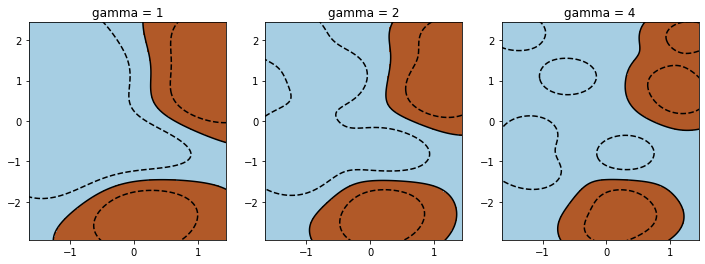

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.svm import SVC

X = np.c_[# negative class
    (.3, -.8),
    (-1.5, -1),
    (-1.3, -.8),
    (-1.1, -1.3),
    (-1.2, -.3),
    (-1.3, -.5),
    (-.6, 1.1),
    (-1.4, 2.2),
    (1, 1),
    # positive class
    (1.3, .8),
    (1.2, .5),
    (.2, -2),
    (.5, -2.4),
    (.2, -2.3),
    (0, -2.7),
    (1.3, 2.1)].T
Y = [-1] * 8 + [1] * 8

gamma_option = [1, 2, 4]
plt.figure(1, figsize=(4*len(gamma_option), 4))

for i, gamma in enumerate(gamma_option, 1):
    svm = SVC(kernel='rbf', gamma=gamma)
    svm.fit(X, Y)
    plt.subplot(1, len(gamma_option), i)
    plt.scatter(X[:, 0], X[:, 1], c=Y, zorder=10, cmap=plt.cm.Paired)
    plt.axis('tight')
    XX, YY = np.mgrid[-3:3:200j, -3:3:200j]
    Z = svm.decision_function(np.c_[XX.ravel(), YY.ravel()])
    Z = Z.reshape(XX.shape)
    plt.pcolormesh(XX, YY, Z > 0, cmap=plt.cm.Paired)
    plt.contour(XX, YY, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'], levels=[-.5, 0, .5])
    plt.title('gamma = %d' % gamma)

plt.show()